In [1]:
# import test.gene_classifier_2 as classifier
import pandas as pd
import scanpy as sc
import scvelo as scv
import anndata as ad
import test.utils as utils

In [2]:
adata_1 = sc.read_loom("data/plate1_fibroblast.loom", validate=False)
adata_2 = sc.read_loom("data/plate2_fibroblast.loom", validate=False)


In [3]:
adata = scv.utils.merge(adata_1, adata_2, copy = True)

In [4]:
adata = ad.concat([adata_1, adata_2], join="inner", label='plate')
adata

AnnData object with n_obs × n_vars = 738 × 37315
    obs: 'plate'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced'

In [5]:
adata.obs

,plate
AACGCTACCACCAT,0
AACGCTACCGTTAC,0
AACGCTAGAAGGCT,0
AACGCTATTGCTCC,0
AACGCTCAACGGTC,0
...,...
TGAGGTGGTAGCAC,1
TGAGGTGTACATAC,1
TGAGGTGTAGATGG,1
TGAGGTTATCCATA,1


In [6]:
adata_1.var

,Accession,Chromosome,End,Start,Strand
Gene,,,,,
Xkr4,ENSMUSG00000051951,1,3671498,3205901,-
U7,ENSMUSG00000088390,1,3678943,3678880,-
U7-1,ENSMUSG00000089420,1,3783798,3783737,-
Rp1,ENSMUSG00000025900,1,4360314,4343507,-
Sox17,ENSMUSG00000025902,1,4496413,4490928,-
...,...,...,...,...,...
AC146633.1,ENSMUSG00000095099,Y,89846914,89846210,+
AC183902.1,ENSMUSG00000096178,Y,90430527,90402688,+
AC151712.1,ENSMUSG00000095134,Y,90763485,90755657,+


In [7]:
adata.var=adata_1.var

In [8]:
# help(ad.concat)

In [9]:
adata

AnnData object with n_obs × n_vars = 738 × 37315
    obs: 'plate'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced'

In [10]:
# adata

In [11]:
# adata_2 = sc.read_loom("data/plate2_fibroblast.loom", validate=False)

In [12]:
# adata_2

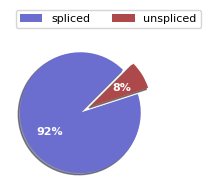

In [11]:
scv.pl.proportions(adata)

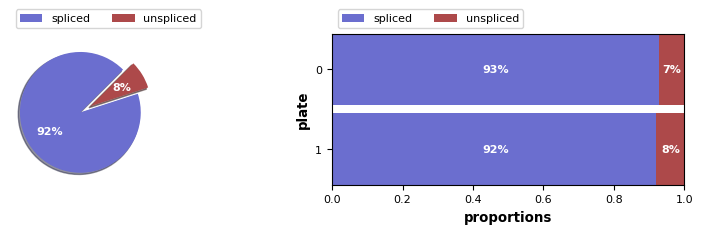

In [12]:
scv.pl.proportions(adata, groupby='plate')

In [13]:
# help(scv.pl.proportions)

In [14]:
scv.pp.filter_genes(adata)
# adata

In [15]:
scv.pp.normalize_per_cell(adata)
# adata

Normalized count data: X, spliced, unspliced.


In [16]:
# scv.pp.filter_genes_dispersion(adata)
# adata

In [17]:
scv.pp.log1p(adata)
# adata

In [18]:
scv.pp.filter_and_normalize(adata)
# adata

In [19]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20)

Filtered out 22789 genes that are detected 20 counts (shared).


In [20]:

scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
adata

SystemError: CPUDispatcher(<function sparse_mean_var_minor_axis at 0x000002732128A550>) returned a result with an error set

In [23]:
scv.tl.recover_dynamics(adata, n_jobs = 8)
adata

recovering dynamics (using 8/8 cores)


  0%|          | 0/7505 [00:00<?, ?gene/s]

    finished (0:07:25) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


AnnData object with n_obs × n_vars = 738 × 14526
    obs: 'plate', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling'
    uns: 'pca', 'neighbors', 'recover_dynamics'
    obsm: 'X_pca'
    varm: 'PCs', 'loss'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced', 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_'
    obsp: 'distances', 'connectivities'

In [24]:
scv.tl.velocity(adata,  mode='dynamical')
adata

computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


AnnData object with n_obs × n_vars = 738 × 14526
    obs: 'plate', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'pca', 'neighbors', 'recover_dynamics', 'velocity_params'
    obsm: 'X_pca'
    varm: 'PCs', 'loss'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced', 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_', 'velocity', 'velocity_u'
    obsp: 'distances', 'connectivities'

In [25]:
scv.tl.velocity_graph(adata, n_jobs = 8)
adata

computing velocity graph (using 8/8 cores)


  0%|          | 0/738 [00:00<?, ?cells/s]

    finished (0:00:10) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


AnnData object with n_obs × n_vars = 738 × 14526
    obs: 'plate', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'pca', 'neighbors', 'recover_dynamics', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca'
    varm: 'PCs', 'loss'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced', 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_', 'velocity', 'velocity_u'
    obsp: 'distances', 'connectivities'

In [26]:
sc.tl.umap(adata)
sc.tl.leiden(adata)
adata.obs['clusters'] = adata.obs['leiden'].copy()

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


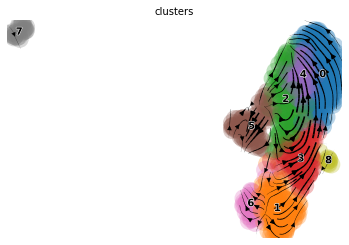

AnnData object with n_obs × n_vars = 738 × 14526
    obs: 'plate', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'leiden', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'pca', 'neighbors', 'recover_dynamics', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'umap', 'leiden', 'clusters_colors'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced', 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_', 'velocity', 'velocity_u'
    obsp: 'distances', 'connectivities'

In [27]:
scv.pl.velocity_embedding_stream(adata, basis='umap')
adata

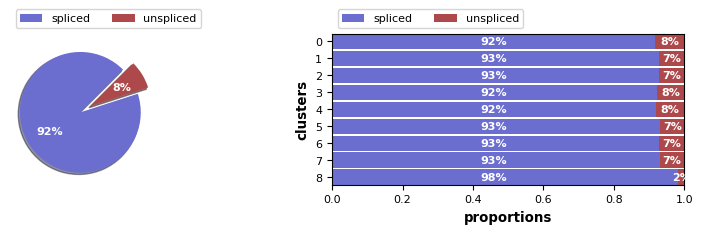

In [28]:
scv.pl.proportions(adata, groupby='clusters')

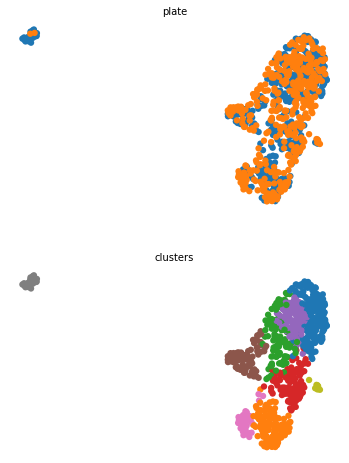

In [29]:
scv.pl.umap(adata, color=['plate', 'clusters'], ncols=1)

In [30]:
# test = list(adata.obs['clusters'])
# adata.obs['cluster'] = test

In [31]:
# test_2 = adata.obs[adata.obs['cluster'] == '5']

In [32]:
adata.write('data/mouse_dynam_all.h5ad')

In [33]:
ad.read('data/mouse_dynam_all.h5ad')

AnnData object with n_obs × n_vars = 738 × 14526
    obs: 'plate', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'leiden', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'clusters_colors', 'leiden', 'neighbors', 'pca', 'plate_colors', 'recover_dynamics', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'ambiguous', 'fit_t', 'fit_tau', 'fit_tau_', 'matrix', 'spanning', 'spliced', 'unspliced', 'velocity', 'velocity_u'
    obsp: 'connectivities', 'distances'

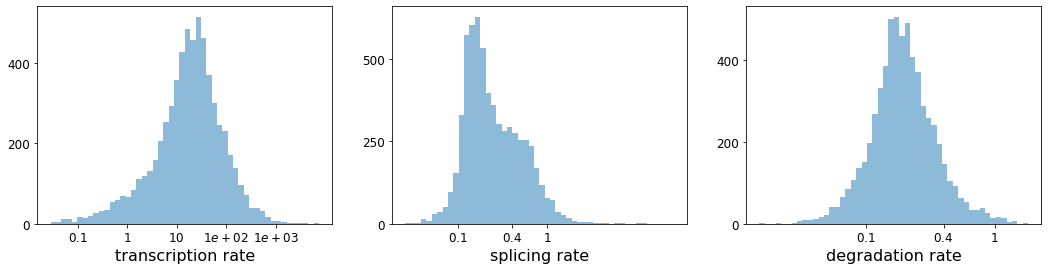

,fit_r2,fit_alpha,fit_beta,fit_gamma,fit_t_,fit_scaling,fit_std_u,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling
Gene,,,,,,,,,,,,,,,,
Mrpl15,0.245010,89.092629,8.433143,0.197737,13.023676,0.023205,2.982156,60.721760,0.256305,0.0,0.0,0.499407,8.715617,347.667693,0.875351,2.299510
Mybl1,0.724676,26.324120,0.580042,0.537687,12.034659,0.432974,10.595470,11.562724,0.320750,0.0,0.0,0.499226,35.225861,40.871179,0.521371,1.834361
Cops5,0.029845,86.874730,6.490320,0.059127,44.836040,0.014944,2.944990,93.114578,0.239730,0.0,0.0,0.499730,9.785717,1295.726725,1.006165,4.639577
Arfgef1,0.352237,47.545827,0.508188,0.175383,16.836989,0.270990,11.923873,20.790575,0.229089,0.0,0.0,0.496747,77.401961,207.845293,1.114706,3.267649
Cpa6,0.568765,15.490295,0.175828,0.271899,17.469408,0.800426,29.217283,17.247274,0.385593,0.0,0.0,0.498271,66.916595,42.864469,0.386484,3.357324


In [34]:
# kinetic rate params
df = adata.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)
    
test_df = scv.get_df(adata, 'fit*', dropna=True)

scv.get_df(adata, 'fit*', dropna=True).head()

computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


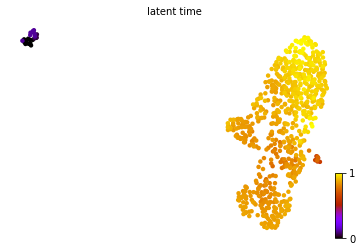

In [35]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

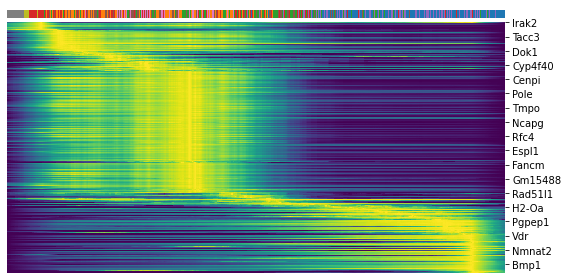

In [36]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='clusters', n_convolve=100)

In [37]:
# scv.pl.scatter(adata, 'AC151712.4', color=['clusters', 'velocity'])

In [38]:
# # top likelihood genes
# top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index
# scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, frameon=False)

In [39]:
test=adata.var[adata.var['Accession'] == 'ENSMUSG00000000171']

In [40]:
test

,Accession,Chromosome,End,Start,Strand,gene_count_corr,fit_r2,fit_alpha,fit_beta,fit_gamma,...,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling,velocity_genes
Gene,,,,,,,,,,,,,,,,,,,,,
Sdhd,ENSMUSG00000000171,9,50603849,50596338,-,NaN,0.060382,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


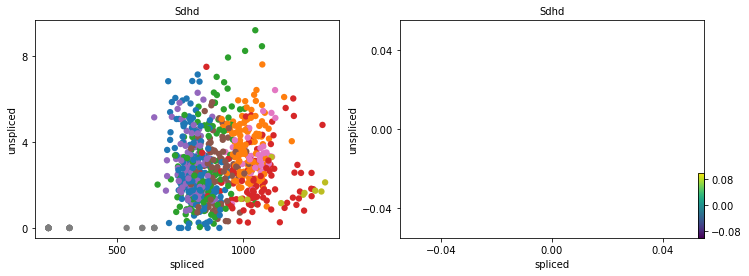

In [41]:
scv.pl.scatter(adata, 'Sdhd', color=['clusters', 'velocity'])

In [42]:
# test_df = test_df[test_df['Gene'] == 'Sdhd']